In [41]:
import pandas as pd
from datautils import _get_time_features,load_forecast_csv
data = pd.read_csv(f'datasets/ETTh1.csv', index_col='date', parse_dates=True)
dt_embed = _get_time_features(data.index)
n_covariate_cols = dt_embed.shape[-1]

In [3]:
data

,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...
2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000


In [4]:
n_covariate_cols

7

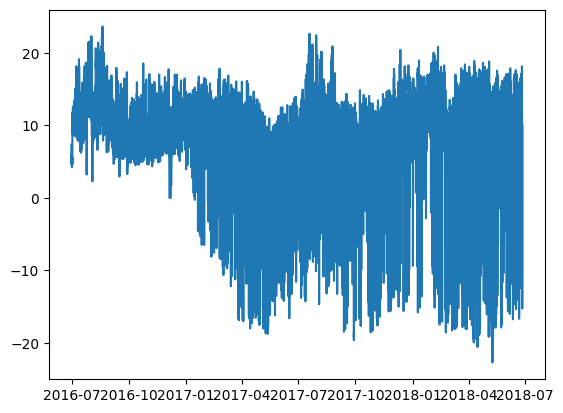

In [6]:
data_1=data["HUFL"]
import matplotlib.pyplot as plt
plt.plot(data_1)

In [7]:
from ts2vec import TS2Vec
model = TS2Vec(
    input_dims=1,
    device="cpu",
    output_dims=320
)

In [9]:
data_1.ndim

1

In [8]:
loss_log = model.fit(
    data_1,
    verbose=True
)

AssertionError: 

In [10]:
# Load the ECG200 dataset from UCR archive
train_data, train_labels, test_data, test_labels = datautils.load_UCR('ECG200')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/UCR/ECG200/ECG200_TRAIN.tsv'

In [43]:
data, train_slice, valid_slice, test_slice, scaler, pred_lens, n_covariate_cols=load_forecast_csv("ETTh1")

In [18]:
data.shape

(1, 17420, 14)

In [37]:
data[0][:, 1]

array([-1.66132477, -1.51686175, -1.37239873, ...,  0.79454663,
        0.93900965,  1.08347268])

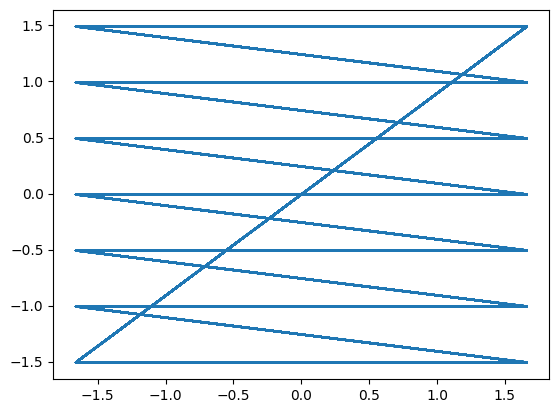

In [38]:
plt.plot(data[0][:, 1] , data[0][:, 2] , label='Time Series Data')

In [29]:
train_data = data[:, train_slice]

In [31]:
train_data.shape

(1, 8640, 14)

In [32]:
model = TS2Vec(
    input_dims=train_data.shape[-1],
    device="cpu",
    # output_dims=320
    output_dims=10
)
loss_log = model.fit(
    data,
    verbose=True
)

Epoch #0: loss=2.555856943130493
Epoch #1: loss=2.5586941242218018
Epoch #2: loss=2.3443996906280518
Epoch #3: loss=2.364508628845215
Epoch #4: loss=2.2383058071136475
Epoch #5: loss=2.1914594173431396
Epoch #6: loss=2.338416576385498
Epoch #7: loss=2.221632480621338
Epoch #8: loss=2.1583688259124756
Epoch #9: loss=2.1424102783203125
Epoch #10: loss=2.2288119792938232
Epoch #11: loss=2.1780052185058594
Epoch #12: loss=1.9871283769607544
Epoch #13: loss=1.7443183660507202
Epoch #14: loss=2.2655394077301025
Epoch #15: loss=2.1429336071014404
Epoch #16: loss=1.9387028217315674
Epoch #17: loss=2.0725531578063965
Epoch #18: loss=2.0925519466400146
Epoch #19: loss=2.180784225463867
Epoch #20: loss=2.0014846324920654
Epoch #21: loss=2.089130163192749
Epoch #22: loss=1.939634919166565
Epoch #23: loss=2.002068042755127
Epoch #24: loss=2.102092981338501
Epoch #25: loss=1.9035042524337769
Epoch #26: loss=1.8624889850616455
Epoch #27: loss=1.8075852394104004
Epoch #28: loss=2.1497623920440674
Epoc

In [33]:
model.save(f'ETTh1.pkl')

In [34]:
all_repr = model.encode(
        data,
        causal=True,
        sliding_length=1,
        sliding_padding= 200,
        batch_size=256
    )

In [44]:
test_repr = all_repr[:, test_slice]
print(test_repr)

[[[ 1.8849405  -0.24103561  0.8007068  ... -0.35658243 -0.0779198
    1.4626509 ]
  [ 1.8881036  -0.16211706  0.7922565  ... -0.3655885  -0.14459476
    1.4338282 ]
  [ 1.789917   -0.12619014  0.8704097  ... -0.34149277 -0.08410416
    1.3875148 ]
  ...
  [ 1.3349284   0.5355507  -0.70045745 ...  0.72967505 -0.6083443
    0.15197228]
  [ 1.3689182   0.43411708 -0.6887668  ...  0.73605204 -0.6060036
    0.08650002]
  [ 1.4214094   0.33159366 -0.6851012  ...  0.71690005 -0.5912178
    0.00613666]]]


In [45]:
test_repr.shape

(1, 2880, 10)

In [46]:
data1.shape

NameError: name 'data1' is not defined